<a href="https://colab.research.google.com/github/snvssk/data298A/blob/saidev/SatelliteImagery/DataProcessing/RooftopImageSegmentation_S2Looking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os
import glob

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

!pip install --upgrade h5py==2.10.0


# import rasterio
import sys

from tqdm import tqdm
from collections import OrderedDict
from sklearn.neighbors import KDTree
# from rasterio.windows import Window

sys.setrecursionlimit(10000)


     |████████████████████████████████| 2.9 MB 3.8 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [ ]:
def LoadDataset(path):

  dataset = []
  
  for filename in sorted(glob.glob( path + '/*png')):

    # Reading PIL Image
    pil_image = Image.open(filename)
    
    # Converting PIL Image to Numpy Array
    np_image = np.array(pil_image)

    # Adding image to Numpy Array List
    dataset.append(np_image)

  return dataset

In [ ]:
def showImage(image):
  plt.imshow(image, interpolation='nearest')
  plt.gcf().set_size_inches(14, 12)
  plt.show()

In [ ]:
trainPath = '/content/drive/Shareddrives/DATA298A/SmallDataset/train'
labelPath = '/content/drive/Shareddrives/DATA298A/SmallDataset/label'

trainDataset = LoadDataset(trainPath)
labelDataset = LoadDataset(labelPath)

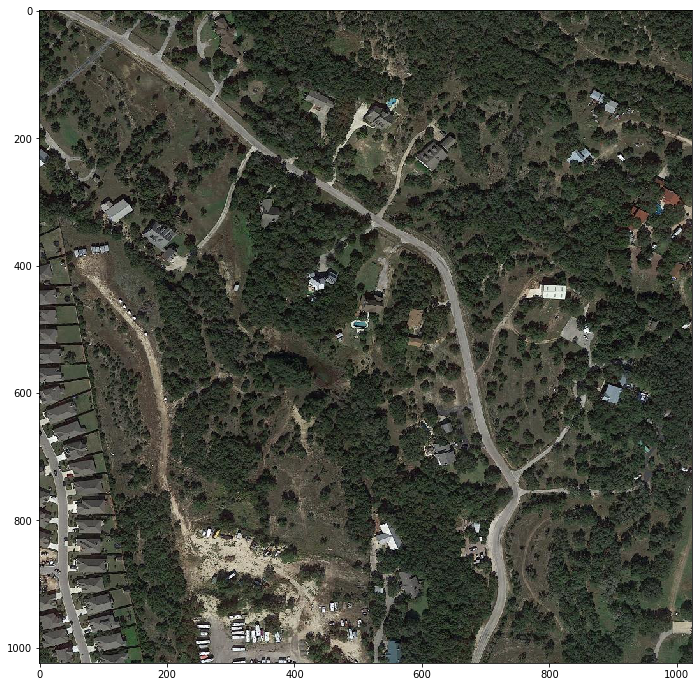

In [ ]:
showImage(trainDataset[10])

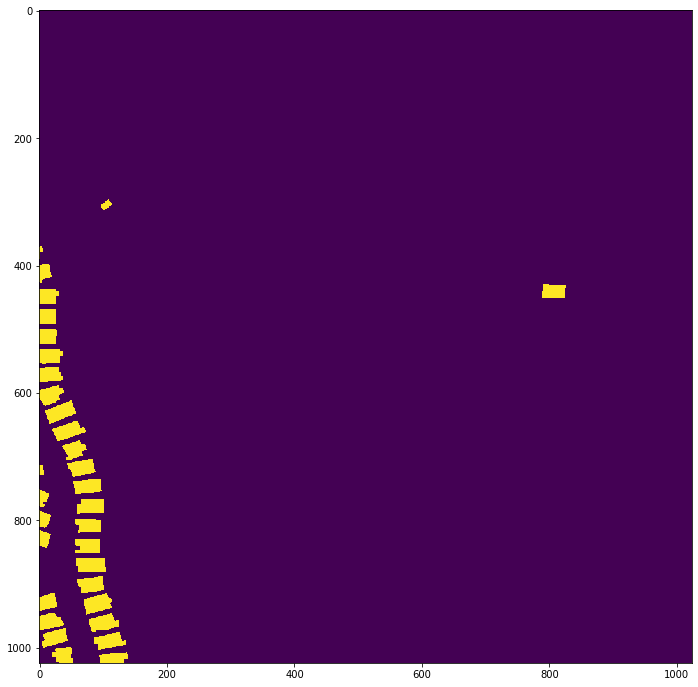

In [ ]:
showImage(labelDataset[10])

In [ ]:
tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
model.compile(X,y)

In [ ]:
! pip install radiant_mlhub

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 137 kB 25.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install rasterio


     |████████████████████████████████| 19.3 MB 60.7 MB/s 


In [ ]:
!mlhub configure

API Key: f243195f6464074f51f12bb822fac37decdcb35bf010c3e078b84acc907826b5
Wrote profile to /root/.mlhub/profiles


In [ ]:
from radiant_mlhub import Dataset

In [ ]:
ds = Dataset.fetch('open_cities_ai_challenge')
for c in ds.collections:
    print(c.id)


open_cities_ai_challenge_test
open_cities_ai_challenge_train_tier_1_labels
open_cities_ai_challenge_train_tier_1_source
open_cities_ai_challenge_train_tier_2_labels
open_cities_ai_challenge_train_tier_2_source


In [ ]:
ds.collection_descriptions

[{'id': 'open_cities_ai_challenge_test',
  'license': '[ODbL-1.0](https://opendatacommons.org/licenses/odbl/1-0/)',
  'types': ['source_imagery']},
 {'id': 'open_cities_ai_challenge_train_tier_1_labels',
  'license': '[ODbL-1.0](https://opendatacommons.org/licenses/odbl/1-0/)',
  'types': ['labels']},
 {'id': 'open_cities_ai_challenge_train_tier_1_source',
  'license': '[ODbL-1.0](https://opendatacommons.org/licenses/odbl/1-0/)',
  'types': ['source_imagery']},
 {'id': 'open_cities_ai_challenge_train_tier_2_labels',
  'license': '[ODbL-1.0](https://opendatacommons.org/licenses/odbl/1-0/)',
  'types': ['labels']},
 {'id': 'open_cities_ai_challenge_train_tier_2_source',
  'license': '[ODbL-1.0](https://opendatacommons.org/licenses/odbl/1-0/)',
  'types': ['source_imagery']}]

In [ ]:
ds.collections.source_imagery

[<Collection id=open_cities_ai_challenge_test>,
 <Collection id=open_cities_ai_challenge_train_tier_1_source>,
 <Collection id=open_cities_ai_challenge_train_tier_2_source>]

In [ ]:
mlhub_test = ds.collections.source_imagery[0]
mlhub_train_tier_1 = ds.collections.source_imagery[1]
mlhub_train_tier_2 = ds.collections.source_imagery[2]

In [ ]:
mlhub_train_tier_1.download('/content/sample_data')

  0%|          | 0/32363.7 [00:00<?, ?M/s]

PosixPath('/content/sample_data/open_cities_ai_challenge_train_tier_1_source.tar.gz')

In [ ]:
%cd /content/sample_data/

/content/sample_data


In [ ]:
!tar -zxvf open_cities_ai_challenge_train_tier_1_source.tar.gz

open_cities_ai_challenge_train_tier_1_source/
open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_znz_bd5c14/
open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_znz_bd5c14/image.tif
open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_znz_bd5c14/stac.json
open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_dar_42f235/
open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_dar_42f235/image.tif
open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_dar_42f235/stac.json
open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_dar_b15fce/
open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_dar_b15fce/image.tif
open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_dar

In [ ]:
SRC_PATH_PATTERN = '../sample_data/open_cities_ai_challenge_train_tier_1_source/*/*.tif'
DST_CSV_PATH = '../sample_data/open_cities_ai_challenge_train_tier_1_source/processed/train_mosaic.csv'

In [ ]:
def read_image(path):
    """Read raster image from specified path (only 3 channles)"""
    with gdal.open(path) as src:
        return src.read()[:3].transpose(1, 2, 0)
    
def read_borders(path):
    """Read 1-pixel borders from images (flattten to 1D array), 
    retruns Dict[str, np.ndarray]
    """
    with gdal.open(path) as src:
        left = src.read(window=Window(0, 0, 1, 1024))[:3]
        right = src.read(window=Window(1023, 0, 1, 1024))[:3]
        top = src.read(window=Window(0, 0, 1024, 1))[:3]
        bottom = src.read(window=Window(0, 1023, 1024, 1))[:3]
    return dict(
        left=left.flatten(), 
        right=right.flatten(), 
        top=top.flatten(), 
        bottom=bottom.flatten(),
    )

def read_descriptors(paths):
    """Read image descriptors (borders)"""
    descriptors = OrderedDict()
    
    with tqdm(paths) as p_paths:
        for path in p_paths:
            id = os.path.basename(path)
            descriptor = read_borders(path)
            descriptors[id] = descriptor
    return descriptors

def get_neighbours(x1, x2, threshold=0.45):
    """Extract two nearest neigbours for each side of image, 
    if [distance to first]/[distance to second] < threshold assume that we find matching image"""
    x2_kd = KDTree(x2)
    distances, keys = x2_kd.query(x1, k=2)
    distances_rel = (distances[:, 0] + 0.0001) / (distances[:, 1] + 0.0001)
    keys = keys[:, 0]
    keys[distances_rel > threshold] = -1
    return keys

def check_validity(x1, x2):
    """Check neighbours validity, check that left neighbour for image right image is the same 
    as right nighbour for left image"""
    x1 = x1.copy()
    x2 = x2.copy()
    
    for i, k1 in enumerate(x1):
        if k1 != -1:
            j = x2[k1]
            if j == -1:
                x1[i] = -1
                
    for i, k1 in enumerate(x2):
        if k1 != -1:
            j = x1[k1]
            if j == -1:
                x2[i] = -1
            
    return x1, x2

def make_cluster(cluster, nb, k, visited, pos):
    """Create clusters of images accoring to its nearest neighbours"""
    cluster[k] = pos
    visited.add(k)
    node = nb[k]
    for _pos, connection in node.items():
        if connection not in visited and connection != -1:
            x, y = pos
            if _pos == 'left':
                x = x - 1
            if _pos == 'right':
                x = x + 1
            if _pos == 'top':
                y = y - 1
            if _pos == 'bottom':
                y = y + 1
            make_cluster(cluster, nb, connection, visited, pos=(x, y))
    
def normalize_cluster(cluster):
    """Looking for min X and min Y position values in cluster
    and shift them to make cluster position started from (0, 0)"""
    xs = [c[0] for c in cluster.values()]
    ys = [c[1] for c in cluster.values()]

    min_x = min(xs)
    min_y = min(ys)
    
    cluster_ = {}
    for k, v in cluster.items():
        cluster_[k] = (v[0] - min_x, v[1] - min_y)
    return cluster_

def get_xy_max(cluster):
    """Looking for max X nd Y positions in cluster"""
    xs = [c[0] for c in cluster.values()]
    ys = [c[1] for c in cluster.values()]
    return max(xs), max(ys)

def reverse_cluster(cluster):
    """Reverse clusters keys and values (encode name: poisiton -> position: name)"""
    return {v: k for k, v in cluster.items()}

In [ ]:
# reading descriptors
paths = glob.glob(SRC_PATH_PATTERN)
print(paths)

['../sample_data/open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_dar_f883a0/image.tif', '../sample_data/open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_kam_4e7c7f/image.tif', '../sample_data/open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_dar_0a4c40/image.tif', '../sample_data/open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_znz_425403/image.tif', '../sample_data/open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_dar_a017f9/image.tif', '../sample_data/open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_mon_f15272/image.tif', '../sample_data/open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_mon_207cc7/image.tif', '../sample_data/open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier

In [ ]:
descriptors = read_descriptors(paths)

100%|██████████| 31/31 [00:06<00:00,  4.44it/s]


In [ ]:
for key, value in descriptors.items():
    print(key, value)

image.tif {'left': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 'right': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 'top': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 'bottom': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)}


In [ ]:
# extract descriptors for each side of image
left_arr = np.array([descriptors[k]["left"] for k in descriptors.keys()])[:, ::8]
right_arr = np.array([descriptors[k]["right"] for k in descriptors.keys()])[:, ::8]
top_arr = np.array([descriptors[k]["top"] for k in descriptors.keys()])[:, ::8]
bottom_arr = np.array([descriptors[k]["bottom"] for k in descriptors.keys()])[:, ::8]

In [ ]:
left_arr,right_arr,top_arr,bottom_arr

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0

In [ ]:
# extarcting nearest negbours for each image according to its border descriptor
# heavy step, may take about 10 minutes
lr_keys = get_neighbours(left_arr, right_arr)
rl_keys = get_neighbours(right_arr, left_arr)
tb_keys = get_neighbours(top_arr, bottom_arr)
bt_keys = get_neighbours(bottom_arr, top_arr)

ValueError: ignored

In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id = 'data298-347103'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://radiant_mlhub/


In [ ]:
import gdal


!gsutil cp gs://radiant_mlhub/opencities_ai/open_cities_ai_challenge_test.tar.gz ./


Copying gs://radiant_mlhub/opencities_ai/open_cities_ai_challenge_test.tar.gz...
| [1 files][  8.4 GiB/  8.4 GiB]   48.1 MiB/s                                   
Operation completed over 1 objects/8.4 GiB.                                      


In [ ]:
!tar -zxvf /content/open_cities_ai_challenge_test.tar.gz

open_cities_ai_challenge_test/
open_cities_ai_challenge_test/open_cities_ai_challenge_test_b84c2b/
open_cities_ai_challenge_test/open_cities_ai_challenge_test_b84c2b/image.tif
open_cities_ai_challenge_test/open_cities_ai_challenge_test_b84c2b/stac.json
open_cities_ai_challenge_test/open_cities_ai_challenge_test_9583d8/
open_cities_ai_challenge_test/open_cities_ai_challenge_test_9583d8/image.tif
open_cities_ai_challenge_test/open_cities_ai_challenge_test_9583d8/stac.json
open_cities_ai_challenge_test/open_cities_ai_challenge_test_e74113/
open_cities_ai_challenge_test/open_cities_ai_challenge_test_e74113/image.tif
open_cities_ai_challenge_test/open_cities_ai_challenge_test_e74113/stac.json
open_cities_ai_challenge_test/open_cities_ai_challenge_test_539866/
open_cities_ai_challenge_test/open_cities_ai_challenge_test_539866/image.tif
open_cities_ai_challenge_test/open_cities_ai_challenge_test_539866/stac.json
open_cities_ai_challenge_test/open_cities_ai_challenge_test_cb3e44/
open_cities_a

In [ ]:
path = '/content/open_cities_ai_challenge_test/open_cities_ai_challenge_test_006f89/image.tif'
mul_ds = gdal.Open(path)


channels = mul_ds.RasterCount
mul_img = np.zeros((mul_ds.RasterXSize, mul_ds.RasterYSize, channels), dtype='uint16')
geoTf   = np.asarray(mul_ds.GetGeoTransform())

for band in range(0, channels):
    mul_img[:,:,band] = mul_ds.GetRasterBand(band+1).ReadAsArray()

In [ ]:
mul_img

array([[[ 88,  70,  50, 255],
        [ 92,  73,  52, 255],
        [ 96,  76,  56, 255],
        ...,
        [121,  99,  86, 255],
        [123, 101,  86, 255],
        [125, 103,  87, 255]],

       [[103,  82,  62, 255],
        [104,  83,  64, 255],
        [105,  83,  65, 255],
        ...,
        [120,  99,  85, 255],
        [121, 100,  85, 255],
        [123, 102,  85, 255]],

       [[107,  85,  66, 255],
        [106,  83,  67, 255],
        [103,  80,  66, 255],
        ...,
        [119,  99,  84, 255],
        [119,  99,  83, 255],
        [120, 100,  83, 255]],

       ...,

       [[183, 179, 173, 255],
        [172, 168, 165, 255],
        [161, 158, 157, 255],
        ...,
        [135, 122, 106, 255],
        [136, 124, 108, 255],
        [137, 125, 109, 255]],

       [[187, 182, 178, 255],
        [181, 177, 174, 255],
        [175, 172, 169, 255],
        ...,
        [136, 124, 107, 255],
        [136, 125, 108, 255],
        [136, 126, 108, 255]],

       [[188

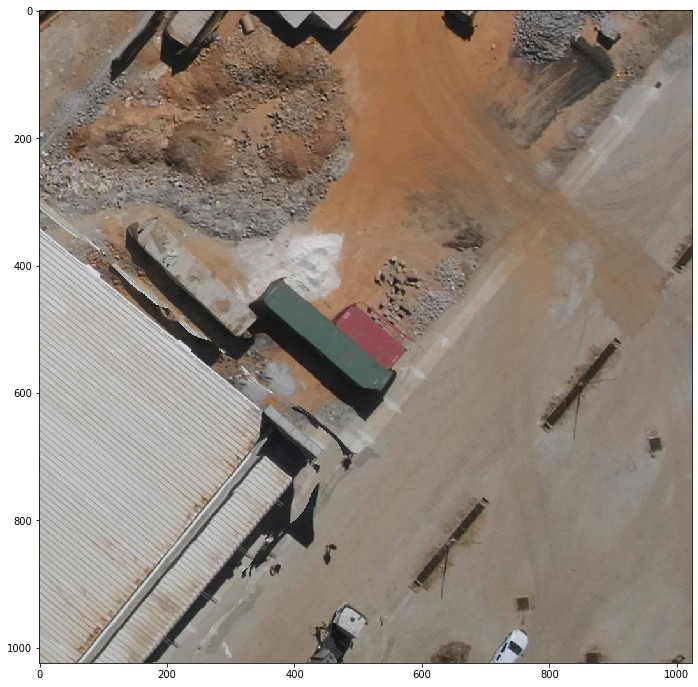

In [ ]:
showImage(mul_img)

# Reading Tiff File

In [ ]:
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = None

In [ ]:
path1 = '/content/sample_data/open_cities_ai_challenge_train_tier_1_source/open_cities_ai_challenge_train_tier_1_source_acc_665946/image.tif'

In [ ]:
from PIL import Image
im = Image.open(path1)

In [ ]:
newsize = (1024, 1024)
im1 = im.resize(newsize)
im1.show()

# Transformation

In [ ]:
import albumentations as A



In [ ]:
train_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
# train_dataset = 

NameError: ignored

In [ ]:
train_transform = A.Compose([
        A.Resize(256, 256),
        A.RandomGamma(),
        A.RGBShift(p=0.2),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
        # ,
        # ToTensorV2()
    ]
    # ,additional_targets = {'image0': 'image'}
)


In [ ]:
trainDataset_transform = train_transform(trainDataset)


TypeError: ignored

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git
%cd Mask_RCNN/
!python setup.py install
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

In [ ]:
!pip show mask-rcnn